In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

In [61]:
titanic_data = pd.read_csv('train.csv')

In [62]:
X = titanic_data.drop(["PassengerId",'Survived','Name','Ticket','Cabin'], axis=1)
y = titanic_data.Survived

In [63]:
X = pd.get_dummies(X)

In [64]:
X = X.fillna({'Age': X.Age.median()}) # заменяем Nan значения медианой возраста

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)  


In [67]:
clf = tree.DecisionTreeClassifier()

In [68]:
param = {'criterion' : ['gini', 'entropy'], 'max_depth': range(1,30)}

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
GridSearchCV_clf = GridSearchCV(clf, param, cv = 5)

In [71]:
GridSearchCV_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [73]:
best_slf = GridSearchCV_clf.best_estimator_

In [74]:
best_slf.score(X_train,y_train)

0.9077181208053692

In [75]:
best_slf.score(X_test,y_test)

0.7864406779661017

In [79]:
from sklearn.metrics import precision_score, recall_score

In [77]:
y_pred = best_slf.predict(X_test)

In [78]:
precision_score(y_test,y_pred)

0.8064516129032258

In [80]:
recall_score(y_test,y_pred)

0.625

In [85]:
y_pred_prob = best_slf.predict_proba(X_test)

<AxesSubplot:>

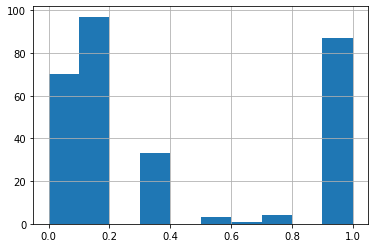

In [86]:
pd.Series(y_pred_prob[: , 1]).hist()

In [102]:
new_y_pred = np.where(y_pred_prob[: , 1] > 0.9, 1,0)

In [103]:
precision_score(y_test,new_y_pred)

0.8160919540229885

In [104]:
recall_score(y_test,new_y_pred)

0.5916666666666667

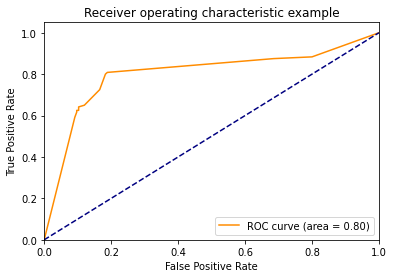

In [110]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()